## Calculating new dependent and independent variables, and modelling

In [1]:
import pandas as pd
import numpy as np

FILE_PATH = r"../generated_data/cp3_modelling/"

In [2]:
df_epi = pd.read_csv(FILE_PATH+"epidemiology_subset.csv")
df_search_trends = pd.read_csv(FILE_PATH+"google-search-trends_subset.csv")
df_gvt_resp = pd.read_csv(FILE_PATH+"government_response_subset.csv")
df_mobility = pd.read_csv(FILE_PATH+"mobility_subset.csv")
df_vacc_search = pd.read_csv(FILE_PATH+"vaccination_search_subset.csv")
df_vacc = pd.read_csv(FILE_PATH+"vaccinations_subset.csv")

df_index = pd.read_csv(r"../datasets/index.csv")
df_demographics = pd.read_csv(r"../datasets/demographics.csv")

### Part 2: What factors influence the government's response?
Independent variable - the old and basic stringency index

Dependent variables (representative of the key metrics for spread of covid - dynamic more than static situation)- deaths, cases, total number of vaccinations, number of new vaccinations (all these should be normalised)

In [3]:
df_epi.head()

,Unnamed: 0,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,879188,2020-01-01,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,879189,2020-01-02,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,879190,2020-01-03,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,879191,2020-01-04,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,879192,2020-01-05,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


Variables to select: new_confirmed, new_deceased, new_recovered, new_tested 

Don't need to look at cumulative statistics since what matters is the rate?

In [4]:
df_vacc.head()

,Unnamed: 0,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,402023,2021-01-10,GB,NaN,2286572.0,NaN,391399.0,NaN,2677971.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,402024,2021-01-11,GB,145076.0,2431648.0,20768.0,412167.0,165844.0,2843815.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,402025,2021-01-12,GB,207661.0,2639309.0,16065.0,428232.0,223726.0,3067541.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,402026,2021-01-13,GB,278943.0,2918252.0,9745.0,437977.0,288688.0,3356229.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,402027,2021-01-14,GB,316694.0,3234946.0,5257.0,443234.0,321951.0,3678180.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Variables to select: new_persons_vaccinated, cumulative_persons_vaccinated, new_persons_fully_vaccinated, cumulative_persons_fully_vaccinated

In [5]:
df_gvt_resp.head()

,Unnamed: 0,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,public_information_campaigns,facial_coverings,vaccination_policy,date,location_key,stringency_index
0,120759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,GB,0.0
1,120760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-02,GB,0.0
2,120761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-03,GB,0.0
3,120762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-04,GB,0.0
4,120763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-05,GB,0.0


In [6]:
# Consolidate variables into 1 df
df_part2 = df_epi[["date", "location_key", "new_confirmed", "new_deceased", "new_recovered", "new_tested"]].merge(df_vacc[["date", "location_key", "new_persons_vaccinated", "cumulative_persons_vaccinated", "new_persons_fully_vaccinated", "cumulative_persons_fully_vaccinated"]], how = "outer", on = "date")

In [7]:
df_part2.head()

,date,location_key_x,new_confirmed,new_deceased,new_recovered,new_tested,location_key_y,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated
0,2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,ID,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,SG,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-02,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-02,ID,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_part2 = df_part2.rename({"location_key_x" : "location_key"}, axis = 1)
df_part2 = df_part2.drop("location_key_y", axis = 1)

df_part2.head()

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated
0,2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,ID,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,SG,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-02,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-02,ID,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_part2 = df_part2.merge(df_gvt_resp[["date", "location_key", "stringency_index"]], how = "outer", on = "date")

df_part2.head()

,date,location_key_x,new_confirmed,new_deceased,new_recovered,new_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,location_key_y,stringency_index
0,2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,GB,0.00
1,2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,IN,0.00
2,2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,SG,5.56
3,2020-01-01,ID,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,GB,0.00
4,2020-01-01,ID,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,IN,0.00


In [10]:
df_part2 = df_part2.rename({"location_key_x" : "location_key"}, axis = 1)
df_part2 = df_part2.drop("location_key_y", axis = 1)

In [11]:
df_part2["date"] = pd.to_datetime(df_part2["date"])
df_part2 = df_part2.set_index("date")

### Standardise metrics by population

i.e. newly tested persons per 10,000 people

In [12]:
# Split dataset into 3 countries
df_part2_gb = df_part2.loc[df_part2["location_key"] == "GB"]
df_part2_id = df_part2.loc[df_part2["location_key"] == "ID"]
df_part2_sg = df_part2.loc[df_part2["location_key"] == "SG"]

In [13]:
columns_to_standardise = df_part2.columns.difference(["date", "location_key", "stringency_index"], sort = False)
columns_to_standardise

Index(['new_confirmed', 'new_deceased', 'new_recovered', 'new_tested',
       'new_persons_vaccinated', 'cumulative_persons_vaccinated',
       'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated'],
      dtype='object')

In [14]:
df_demographics.head()

,location_key,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,77265.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
3,AF_BAL,1509183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF_BAM,495557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
pop_gb = df_demographics["population"].loc[df_demographics["location_key"] == "GB"].iloc[0]
pop_id  = df_demographics["population"].loc[df_demographics["location_key"] == "ID"].iloc[0]
pop_sg = df_demographics["population"].loc[df_demographics["location_key"] == "SG"].iloc[0]

In [16]:
df_part2_gb

,location_key,new_confirmed,new_deceased,new_recovered,new_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,stringency_index
date,,,,,,,,,,
2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.56
2020-01-02,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-01-02,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...
2022-09-11,GB,0.0,0.0,NaN,NaN,61419.0,1.025331e+09,238500.0,944970466.0,NaN
2022-09-11,GB,0.0,0.0,NaN,NaN,23.0,5.024324e+06,86.0,5004498.0,NaN
2022-09-12,GB,0.0,0.0,NaN,NaN,61675.0,1.025392e+09,272886.0,945243352.0,NaN


In [17]:
df_part2_gb[columns_to_standardise] = df_part2_gb[columns_to_standardise].apply(lambda x : (x / pop_gb) * 10000)

df_part2_gb

/Users/whoisvasu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,location_key,new_confirmed,new_deceased,new_recovered,new_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,stringency_index
date,,,,,,,,,,
2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-01-01,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.56
2020-01-02,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-01-02,GB,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...
2022-09-11,GB,0.0,0.0,NaN,NaN,9.215553,153844.720233,35.785497,141787.158909,NaN
2022-09-11,GB,0.0,0.0,NaN,NaN,0.003451,753.869725,0.012904,750.894953,NaN
2022-09-12,GB,0.0,0.0,NaN,NaN,9.253964,153853.974198,40.944910,141828.103819,NaN


In [18]:
df_part2_id[columns_to_standardise] = df_part2_id[columns_to_standardise].apply(lambda x : (x / pop_id) * 10000)

df_part2_id

/Users/whoisvasu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,location_key,new_confirmed,new_deceased,new_recovered,new_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,stringency_index
date,,,,,,,,,,
2020-01-01,ID,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-01-01,ID,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-01-01,ID,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.56
2020-01-02,ID,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-01-02,ID,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...
2022-09-12,ID,0.067563,0.000622,0.126680,NaN,2.254833,37488.254259,9.976689,34558.015448,NaN
2022-09-12,ID,0.067563,0.000622,0.126680,NaN,0.002194,183.691046,0.007129,182.971145,NaN
2022-09-13,ID,0.105878,0.000731,0.132237,NaN,2.659770,37490.914030,7.416727,34565.432175,NaN


In [19]:
df_part2_sg[columns_to_standardise] = df_part2_sg[columns_to_standardise].apply(lambda x : (x / pop_sg) * 10000)

df_part2_sg

/Users/whoisvasu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,location_key,new_confirmed,new_deceased,new_recovered,new_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,stringency_index
date,,,,,,,,,,
2020-01-01,SG,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-01-01,SG,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-01-01,SG,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.56
2020-01-02,SG,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2020-01-02,SG,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...
2022-09-11,SG,2.483615,0.000000,NaN,NaN,104.983588,1.752599e+06,407.668405,1.615239e+06,NaN
2022-09-11,SG,2.483615,0.000000,NaN,NaN,0.039314,8.588084e+03,0.147000,8.554196e+03,NaN
2022-09-12,SG,5.729579,0.000000,NaN,NaN,105.421169,1.752705e+06,466.444446,1.615706e+06,NaN


### Replace all NAs with ffill (since it is unlikely that there will actually be 0 cases deceased or confirmed daily)

If there are still NAs, replace with 0

In [20]:
df_part2_gb.isna().sum()

location_key                              0
new_confirmed                             0
new_deceased                              0
new_recovered                          6229
new_tested                              982
new_persons_vaccinated                 1101
cumulative_persons_vaccinated          1092
new_persons_fully_vaccinated           1206
cumulative_persons_fully_vaccinated    1197
stringency_index                        142
dtype: int64

In [21]:
df_part2_gb.interpolate(method = "ffill").isna().sum()

location_key                              0
new_confirmed                             0
new_deceased                              0
new_recovered                          6229
new_tested                              270
new_persons_vaccinated                 1095
cumulative_persons_vaccinated          1092
new_persons_fully_vaccinated           1113
cumulative_persons_fully_vaccinated    1110
stringency_index                          0
dtype: int64

In [22]:
df_part2_gb = df_part2_gb.interpolate(method = "ffill")
df_part2_gb = df_part2_gb.fillna(0)

In [23]:
df_part2_id = df_part2_id.interpolate(method = "ffill")
df_part2_id = df_part2_id.fillna(0)

In [24]:
df_part2_sg = df_part2_sg.interpolate(method = "ffill")
df_part2_sg = df_part2_sg.fillna(0)

### Train model for part 2

One model for each country

In [26]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## England

In [28]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(df_part2_gb[columns_to_standardise], df_part2_gb["stringency_index"], test_size = 0.2, random_state =1)

In [48]:
trained_models_gb = {"model" : [], "predicted_results" : [], "score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_gb["model"].append(model)
    trained_models_gb["predicted_results"].append(y_pred)
    trained_models_gb["score"].append(rmse)

In [49]:
for x in range(len(trained_models_gb['model'])):
    print('Score for', trained_models_gb['model'][x], ':', trained_models_gb['score'][x])

Score for LinearRegression() : 17.84952351252143
Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 14.224517496824868
Score for RandomForestRegressor(n_estimators=10, random_state=1) : 17.36353861933767


### The Linear Regression Model

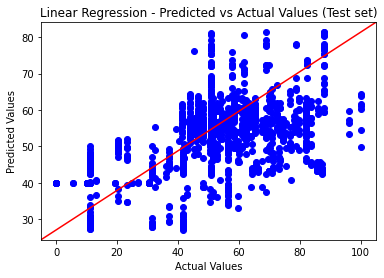

In [32]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][0], color = 'blue')
plt.title('(UK) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [33]:
model_coefficients = trained_models_gb["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                         Coef Val  Abs Coef Val
new_confirmed                       -7.911701e-01  7.911701e-01
new_deceased                         1.698563e+02  1.698563e+02
new_recovered                        1.014783e-09  1.014783e-09
new_tested                           1.278310e-01  1.278310e-01
new_persons_vaccinated               2.152187e-03  2.152187e-03
cumulative_persons_vaccinated        4.308251e-05  4.308251e-05
new_persons_fully_vaccinated         4.846688e-03  4.846688e-03
cumulative_persons_fully_vaccinated -1.672918e-04  1.672918e-04


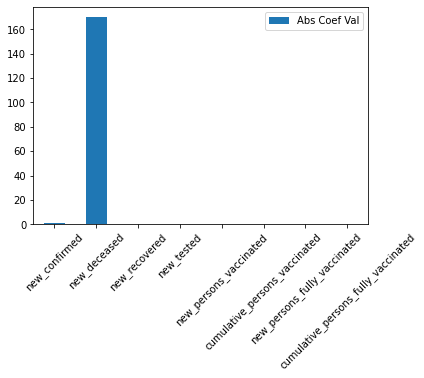

In [34]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=45)

# Looks like death is the strongest contributor to how strict govt response will be in GB

### The Decision Tree

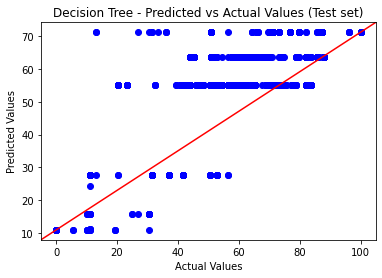

In [35]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][1], color = 'blue')
plt.title('(UK) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

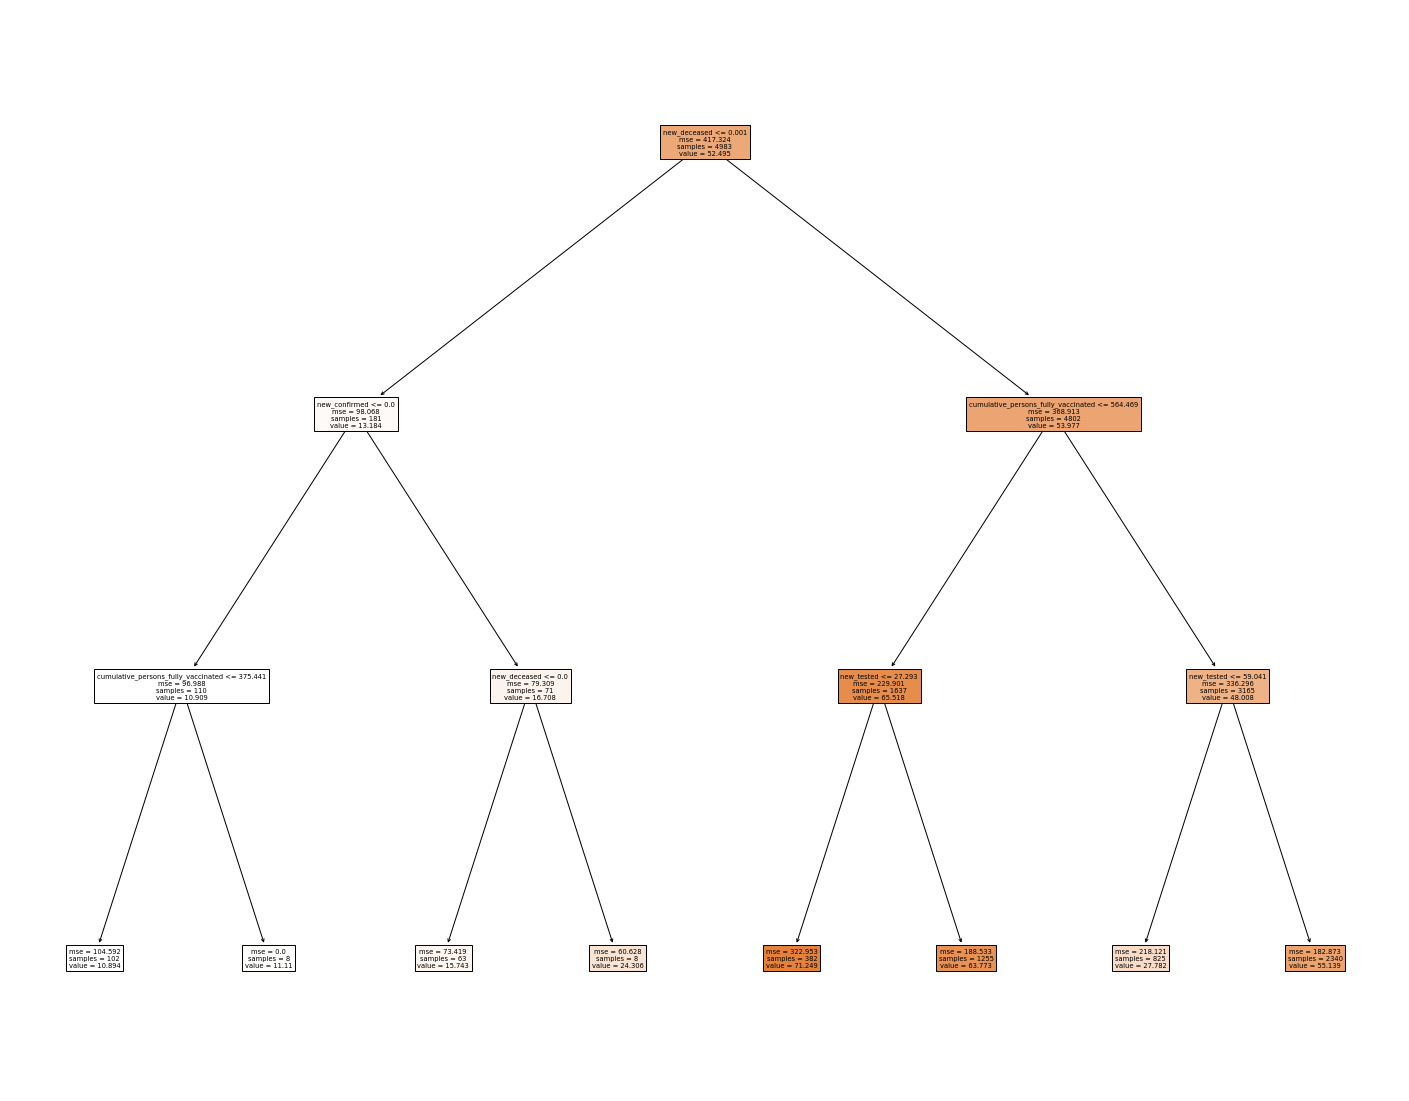

In [36]:
model = trained_models_gb["model"][1]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True)

### The Random Forest

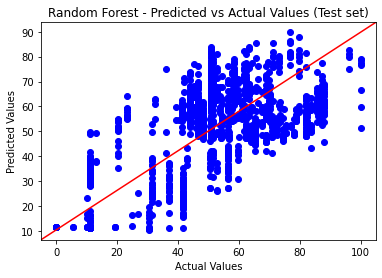

In [37]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][2], color = 'blue')
plt.title('(UK) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

ValueError: x and y must be the same size

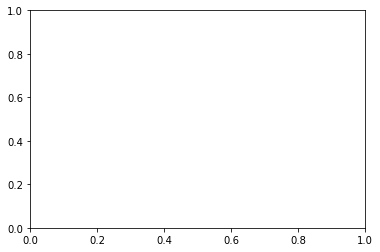

In [46]:
# Visualising the Random Forest Regression results
  
# arrange for creating a range of values
# from min value of x to max 
# value of x with a difference of 0.01 
# between two consecutive values
X_grid = np.arange(min(X_test), max(y_test), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(x_test, y_test, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, trained_models_gb["model"][2].predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
#plt.xlabel('Position level')
#plt.ylabel('Salary')
plt.show()

## Indonesia

In [51]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [57]:
x_train, x_test, y_train, y_test = train_test_split(df_part2_id[columns_to_standardise], df_part2_id["stringency_index"], test_size = 0.2, random_state =1)

In [63]:
trained_models_id = {"model" : [], "predicted_results" : [], "score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_id["model"].append(model)
    trained_models_id["predicted_results"].append(y_pred)
    trained_models_id["score"].append(rmse)

In [65]:
for x in range(len(trained_models_id['model'])):
    print('Score for', trained_models_id['model'][x], ':', trained_models_id['score'][x])

Score for LinearRegression() : 18.77446695163229
Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 15.60460200637064
Score for RandomForestRegressor(n_estimators=10, random_state=1) : 17.359695971284225


### The Linear Regression Model

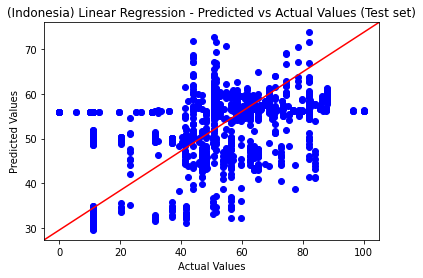

In [66]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][0], color = 'blue')
plt.title('(Indonesia) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [67]:
model_coefficients = trained_models_id["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                      Coef Val  Abs Coef Val
new_confirmed                        11.722316     11.722316
new_deceased                         69.808514     69.808514
new_recovered                        -4.889236      4.889236
new_tested                           -1.541927      1.541927
new_persons_vaccinated               -0.004607      0.004607
cumulative_persons_vaccinated         0.000652      0.000652
new_persons_fully_vaccinated          0.059569      0.059569
cumulative_persons_fully_vaccinated  -0.001331      0.001331


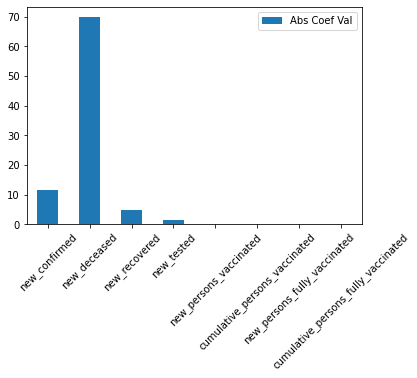

In [68]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=45)

### The Decision Tree

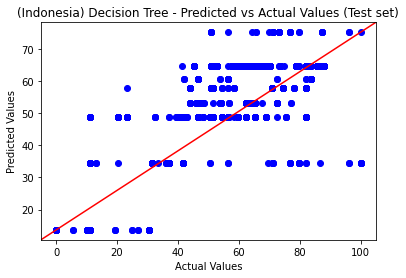

In [69]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][1], color = 'blue')
plt.title('(Indonesia) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

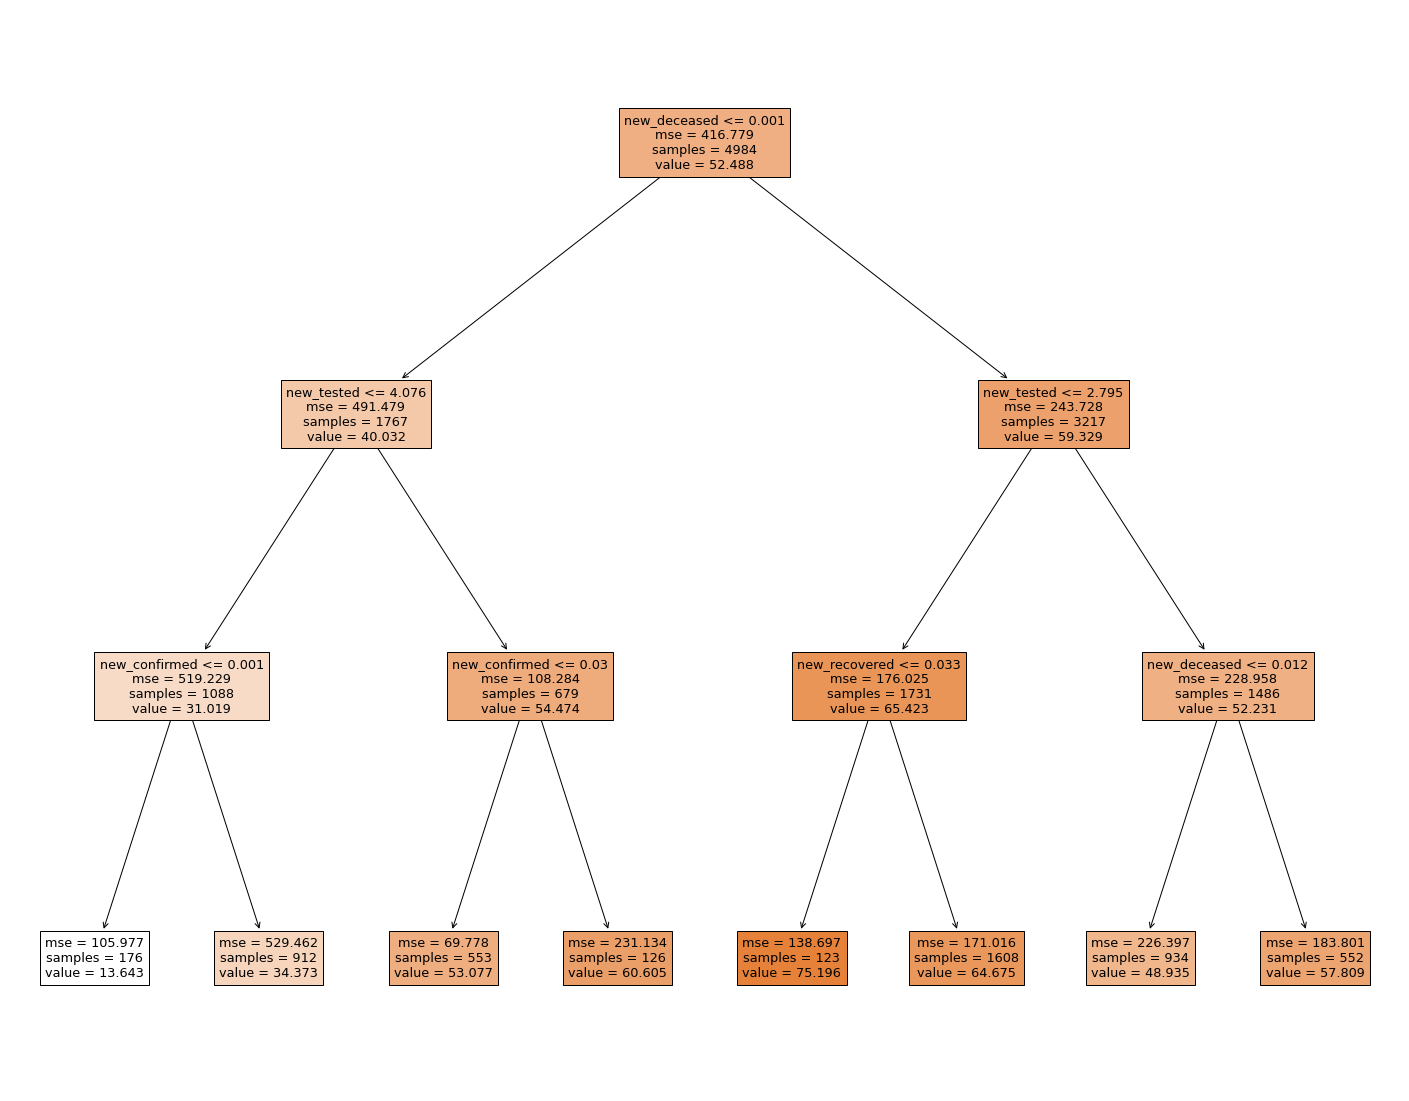

In [70]:
model = trained_models_id["model"][1]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True)

### The Random Forest

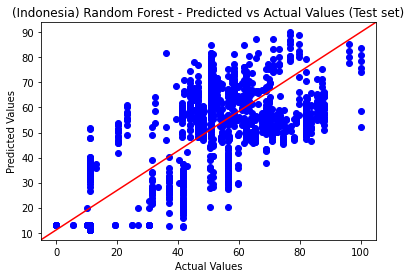

In [71]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][2], color = 'blue')
plt.title('(Indonesia) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

## Singapore

In [72]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [76]:
x_train, x_test, y_train, y_test = train_test_split(df_part2_sg[columns_to_standardise], df_part2_sg["stringency_index"], test_size = 0.2, random_state =1)

In [77]:
trained_models_sg = {"model" : [], "predicted_results" : [], "score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_sg["model"].append(model)
    trained_models_sg["predicted_results"].append(y_pred)
    trained_models_sg["score"].append(rmse)

In [78]:
for x in range(len(trained_models_sg['model'])):
    print('Score for', trained_models_sg['model'][x], ':', trained_models_sg['score'][x])

Score for LinearRegression() : 18.750094549438938
Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 14.656936873700989
Score for RandomForestRegressor(n_estimators=10, random_state=1) : 17.63343213020417


### The Linear Regression Model

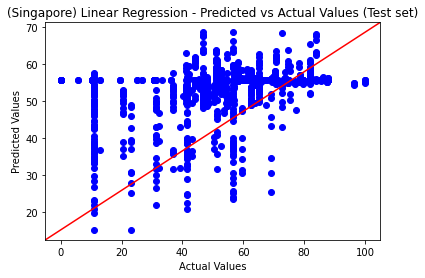

In [79]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][0], color = 'blue')
plt.title('(Singapore) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [80]:
model_coefficients = trained_models_sg["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                         Coef Val  Abs Coef Val
new_confirmed                       -7.953910e-01  7.953910e-01
new_deceased                        -5.053787e+01  5.053787e+01
new_recovered                       -3.260396e-08  3.260396e-08
new_tested                           3.708421e-02  3.708421e-02
new_persons_vaccinated               1.627156e-04  1.627156e-04
cumulative_persons_vaccinated        1.088894e-05  1.088894e-05
new_persons_fully_vaccinated         5.456292e-04  5.456292e-04
cumulative_persons_fully_vaccinated -2.433230e-05  2.433230e-05


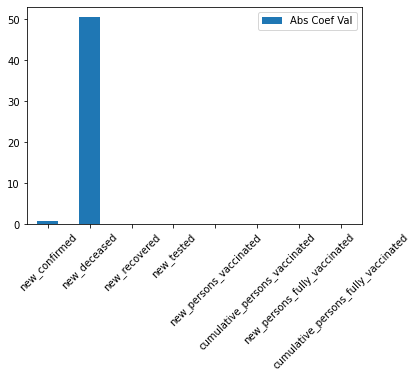

In [81]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=45)

### The Decision Tree

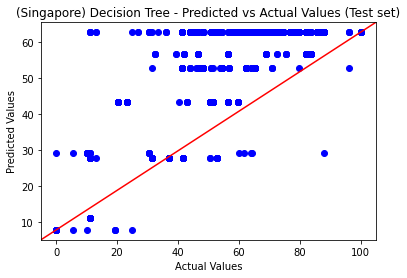

In [82]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][1], color = 'blue')
plt.title('(Singapore) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

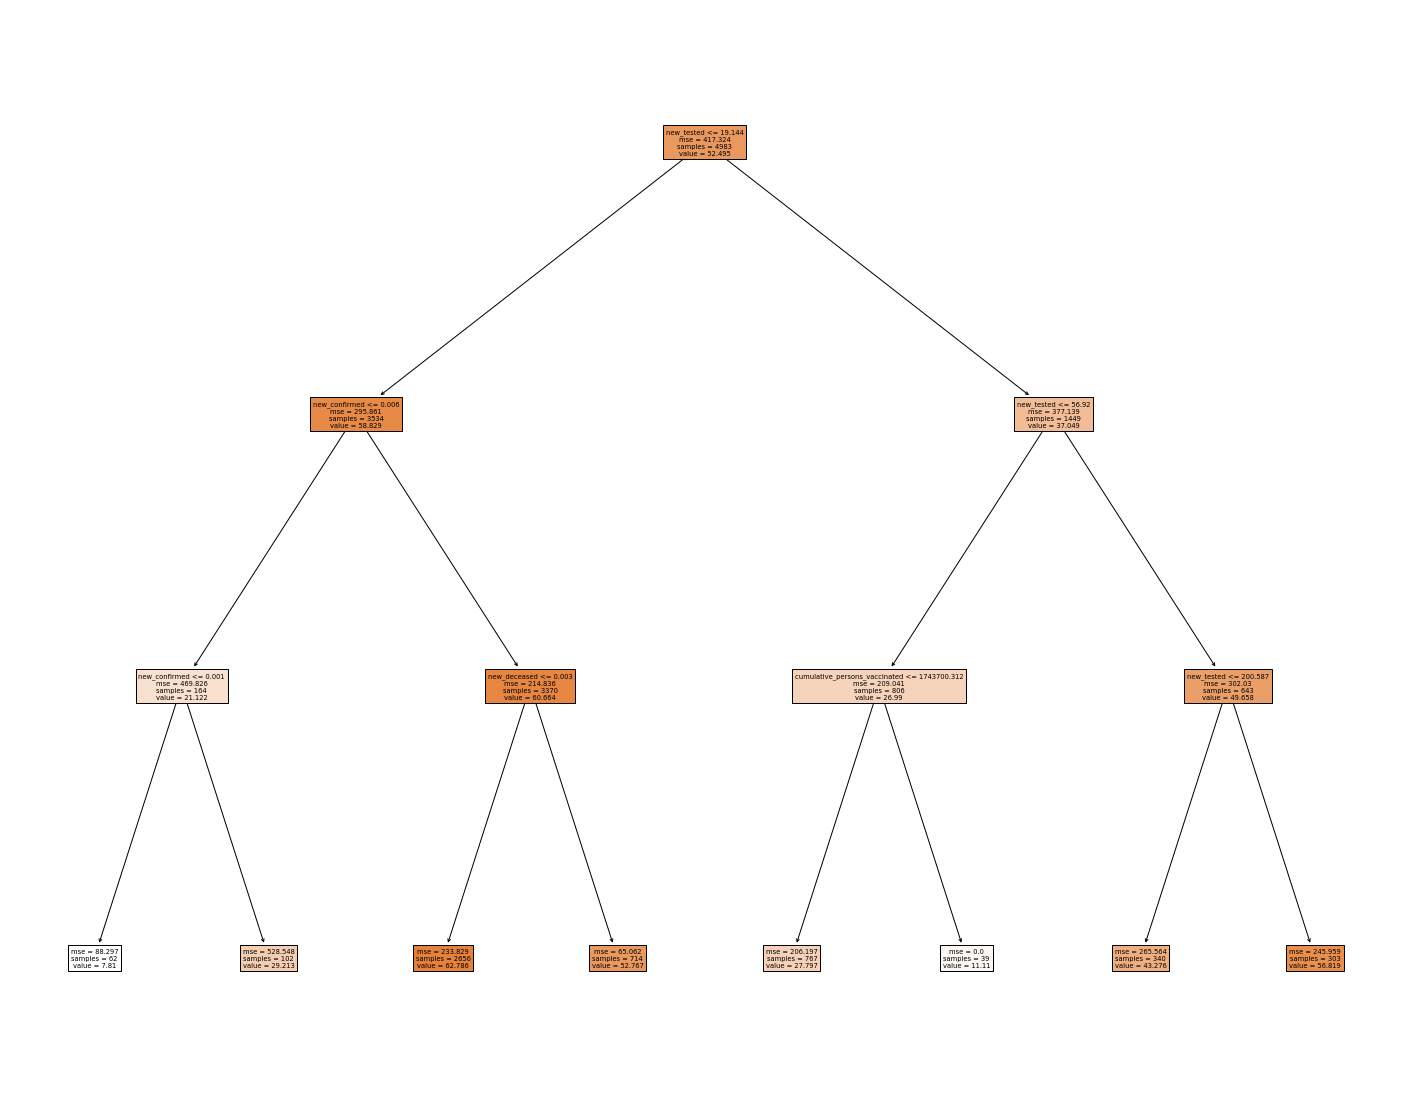

In [83]:
model = trained_models_sg["model"][1]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True)

### The Random Forest

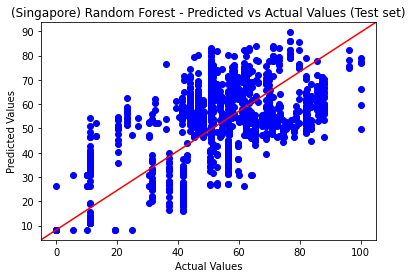

In [84]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][2], color = 'blue')
plt.title('(Singapore) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()